In this exercise we will play with a classical Boston Property Dataset. It describes the prices of properties in Boston in '70. The task is to understand how they depend on multiple factors. Please consider the following URL for more details#https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

Note the list of considered variables. Varianble number 14:
MEDV - Median value of owner-occupied homes in $1000's
is the descriptive variable we want to understand.

In the files we use for this demonstration file boston contains only first 13 variables (we will use those data to construct the Mapper graph). The last variable - the descriptive one is stored in boston_prices. 

In [2]:
import kmapper as km
from kmapper import jupyter 
import numpy as np
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline

# Initialize
mapper = km.KeplerMapper(verbose=1)

KeplerMapper(verbose=1)


In [3]:
boston_txt = np.loadtxt("boston", dtype=str)
boston_prices_txt = np.loadtxt("boston_prices", dtype=str)

boston = boston_txt.astype(np.float)
boston_prices = boston_prices_txt.astype(np.float)
boston_prices = boston_prices.reshape( [len(boston_prices),1] )

#We have choosen the lens function based on stochastic neighbour embedding. Typically the choice of the lense function is the most difficult and involvinf in the process of creating Mapper graph. It often requires so called
#expert knowledge. Here we do make an educative guess :)
projected_data = mapper.fit_transform(boston,projection=sklearn.manifold.TSNE())

..Composing projection pipeline of length 1:
	Projections: TSNE()
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (506, 13)

..Projecting data using: 
	TSNE(verbose=1)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 506 samples in 0.001s...
[t-SNE] Computed neighbors for 506 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 506 / 506
[t-SNE] Mean sigma: 14.218890
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.192123
[t-SNE] KL divergence after 1000 iterations: 0.250714

..Scaling with: MinMaxScaler()



In [4]:
mapper = km.KeplerMapper(verbose=1)

#Here is a process of creation of Mapper graph with different clustering function. You may plug in here anything from sklearn.cluster - I have provided 
#only a few examples. Play with it and see how the clustering method determine the output. 
graph = mapper.map(projected_data,boston,cover=km.Cover(10, 0.5)
                   #,clusterer=sklearn.cluster.DBSCAN(eps=20, min_samples=3)
                   ,clusterer=sklearn.cluster.KMeans(init="k-means++", n_clusters=2)
                   #,clusterer=sklearn.cluster.MeanShift(min_bin_freq=1, cluster_all=True, max_iter=300)
                   #,clusterer=sklearn.cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean', compute_full_tree='auto', linkage='ward')
                   #,clusterer=sklearn.cluster.SpectralClustering(n_clusters=8,n_init=10,n_neighbors=10)
                  )

# Visualize it
#N.B. if your keppele mapper version is <= 1.4.1 you do want the line color_function_name='placeholder_name'
#commented. For higher versions, please uncomment this line. For some reason kepler mapper do not have backward 
#compatibility here. 
html = mapper.visualize(graph,path_html="boston_dataset.html",
                        color_function=boston_prices,
                        #color_function_name='placeholder_name'
                       )

jupyter.display(path_html="boston_dataset.html")

KeplerMapper(verbose=1)
Mapping on data shaped (506, 13) using lens shaped (506, 2)

Creating 100 hypercubes.

Created 291 edges and 108 nodes in 0:00:00.871176.
Wrote visualization to: boston_dataset.html


/home/pawel/anaconda3/lib/python3.8/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


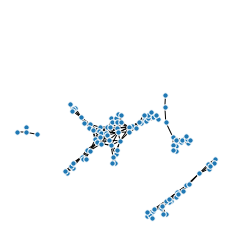

In [5]:
km.draw_matplotlib(graph, layout="spring")